# Lab | Imbalanced data 

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.


Load the dataset and explore the variables.
- We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
- Extract the target variable.
- Extract the independent variables and scale them.
- Build the logistic regression model.
- Evaluate the model.
- Even a simple model will give us more than 70% accuracy. Why?
- Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

In [3]:
pd.set_option('display.max_columns', None)
data=pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data = data[['tenure','SeniorCitizen', 'MonthlyCharges', 'Churn']]
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [5]:
data.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

In [7]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [8]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [15]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_36999/250236183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)


In [8]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [16]:
data.dtypes

tenure              int64
SeniorCitizen      object
MonthlyCharges    float64
Churn              object
dtype: object

In [10]:
data.columns

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn'], dtype='object')

# X-y split

In [18]:
# X/y split
X = data.drop('Churn',axis = 1)
y = data['Churn']
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Multicollinearity check

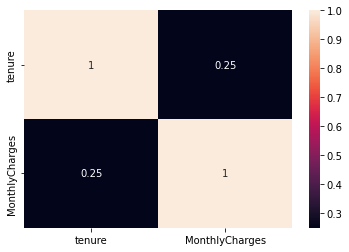

In [19]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Distributions of columns

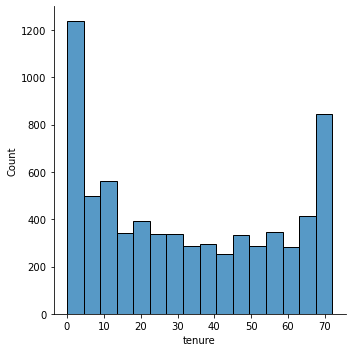

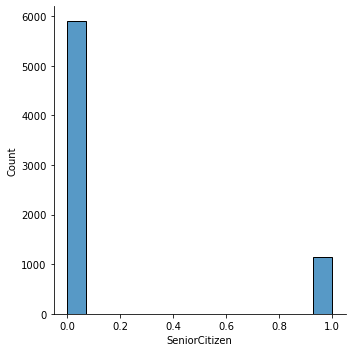

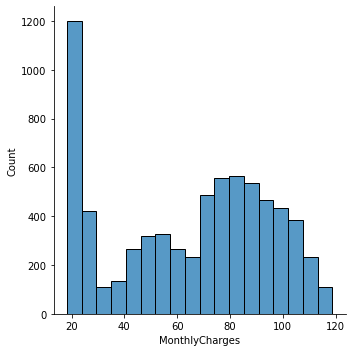

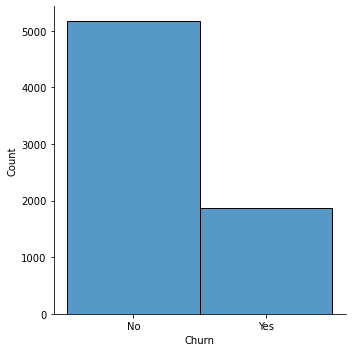

In [21]:
sns.displot(data['tenure'])
plt.show()

sns.displot(data['SeniorCitizen'])
plt.show()

sns.displot(data['MonthlyCharges'])
plt.show()

sns.displot(data['Churn'])
plt.show()

# minmax scaling

In [22]:
# X_train numerical minmax scaling

from sklearn.preprocessing import MinMaxScaler

# X_train
X_train_num = X_train.select_dtypes(include = np.number)
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)

# X_test (using the transformer that we created above in the training stage)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_normalized = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns)


In [23]:
X_train_normalized.shape, X_test_normalized.shape, 

((5634, 2), (1409, 2))

In [25]:
X_train_normalized.head()

,tenure,MonthlyCharges
0,0.291667,0.464375
1,0.750000,0.786746
2,0.013889,0.051819
3,0.055556,0.517688
4,0.000000,0.434978


In [26]:
X_test_normalized.head()

,tenure,MonthlyCharges
0,0.013889,0.065272
1,0.569444,0.069756
2,0.722222,0.010962
3,0.013889,0.578974
4,0.930556,0.321873


# onehot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

# X_train
X_train_cat = X_train.select_dtypes(include = object)
encoder = OneHotEncoder(drop='first').fit(X_train_cat) # need to keep encoder
cols=encoder.get_feature_names_out(input_features=X_train_cat.columns)
encoded = encoder.transform(X_train_cat).toarray() #we want to transform the X_cut and make it an array
X_train_encoded = pd.DataFrame(encoded,columns=cols) #make it a df

# X_test (using the encoder that we created above in the training stage)
X_test_cat = X_test.select_dtypes(include = object)
cols=encoder.get_feature_names_out(input_features=X_test_cat.columns)
encoded = encoder.transform(X_test_cat).toarray()
X_test_encoded = pd.DataFrame(encoded,columns=cols) 


In [ ]:
X_train_encoded.shape, X_test_encoded.shape

# concat train-test data

In [31]:
X_train_transformed = pd.concat([X_train_normalized, X_train_encoded], axis=1)

X_test_transformed = pd.concat([X_test_normalized, X_test_encoded], axis=1)

In [32]:
X_train_transformed.head()

,tenure,MonthlyCharges,SeniorCitizen_1
0,0.291667,0.464375,0.0
1,0.750000,0.786746,0.0
2,0.013889,0.051819,0.0
3,0.055556,0.517688,0.0
4,0.000000,0.434978,0.0


In [34]:
X_test_transformed.head()

,tenure,MonthlyCharges,SeniorCitizen_1
0,0.013889,0.065272,0.0
1,0.569444,0.069756,0.0
2,0.722222,0.010962,0.0
3,0.013889,0.578974,0.0
4,0.930556,0.321873,0.0


In [33]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [35]:
y_test.head()

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

In [36]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 


# applying the model

In [37]:
data['Churn'].value_counts() 
# imbalanced data-target

No     5174
Yes    1869
Name: Churn, dtype: int64

In [38]:
# Compare your model with the stupidest model of giving only the 'one side' for all the cases. 

# Naive Model
5174/(5174+1869) #the accuracy of predicting Churn as 'No' at all cases.

0.7346301292063041

## Model LogisticRegression with solver lbfgs

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_transformed, y_train)
LR.score(X_test_transformed, y_test)

0.8041163946061036

In [40]:
LR.predict_proba(X_train_transformed)

array([[0.71317004, 0.28682996],
       [0.84319759, 0.15680241],
       [0.74683136, 0.25316864],
       ...,
       [0.84841088, 0.15158912],
       [0.23910814, 0.76089186],
       [0.92351195, 0.07648805]])

### Metrics 

In [42]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #the harmonized mean of the precision and recall. a trade off between the two

pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='Yes')) #Out of the cases that we said the person woul quit, 61 percent had.
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))


precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred) 

array([[959,  77],
       [199, 174]])

In [44]:
# predicted  | No  | Yes |  
# ------------------------
# actual  No |1168 | 130| 
# ------------------------
#        Yes | 253| 210|
# ------------------------

## Model LogisticRegression with solver Saga

In [45]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(solver='saga').fit(X_train_transformed, y_train)
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.8041163946061036

In [46]:
pd.Series(y_test).value_counts()

No     1036
Yes     373
Name: Churn, dtype: int64

In [47]:
pd.Series(predictions).value_counts()

No     1158
Yes     251
dtype: int64

## Model KNeighborsClassifier

In [48]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)


0.7849538679914834

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_clf)

array([[955,  81],
       [222, 151]])

In [50]:
pd.Series(y_test).value_counts()

No     1036
Yes     373
Name: Churn, dtype: int64

In [51]:
pd.Series(predictions_clf).value_counts()

No     1177
Yes     232
dtype: int64

# SMOTE - for imbalanced data target

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [54]:
X_train_SMOTE.shape

(8276, 3)

In [55]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='Yes')) #precision is 47%. Out of the cases that we said the person would quit, 61 percent had.
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))  #?? 72% was the perc that was correctly caught by the model.
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


In [56]:
LR.score(X_test_transformed, y_test)

0.7452093683463449

In [57]:
!git add . 
!git commit -m "completed"
!git push

[master f78a534] completed
 4 files changed, 6323 insertions(+)
 create mode 100644 files_for_lab/.DS_Store
 create mode 100644 files_for_lab/.ipynb_checkpoints/Lab_Imbalanced_data-checkpoint.ipynb
 create mode 100644 files_for_lab/.ipynb_checkpoints/Untitled-checkpoint.ipynb
 create mode 100644 files_for_lab/Lab_Imbalanced_data.ipynb
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 8 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 42.57 KiB | 10.64 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To https://github.com/begumerdem/lab-imbalanced-data.git
   aef05c8..f78a534  master -> master
